In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import data_retriever as dr
from config import api_key
import requests
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'config'

In [3]:
regions = ['Africa','Asia','Europe','North America','Oceania','South America', 'Unknown']

In [4]:
refugees= dr.get_dhs_data_by_table_number(13)

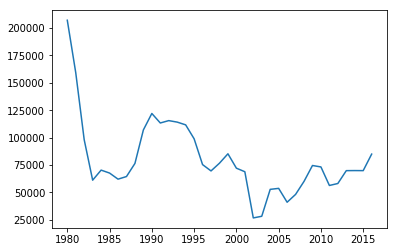

In [5]:
plt.plot(refugees['Year'],refugees['Number'])

In [6]:
refugee_by_region = dr.get_dhs_data_by_table_number(14)
refugee_by_region = refugee_by_region.loc[refugee_by_region['Region and country of nationality'].isin(regions)]

In [7]:
refugee_by_region =refugee_by_region.rename(columns={'Region and country of nationality': 'region'})

In [8]:
refugee_by_region = refugee_by_region.set_index('region')
refugee_by_region = refugee_by_region.fillna(0)

In [9]:
totals = [48218, 60107, 74602, 73293, 56384.0, 58179.0, 69909.0, 69975.0, 69920.0,
 84989.0]
colors =  ['b','g','r','m','y','k', 'orange']


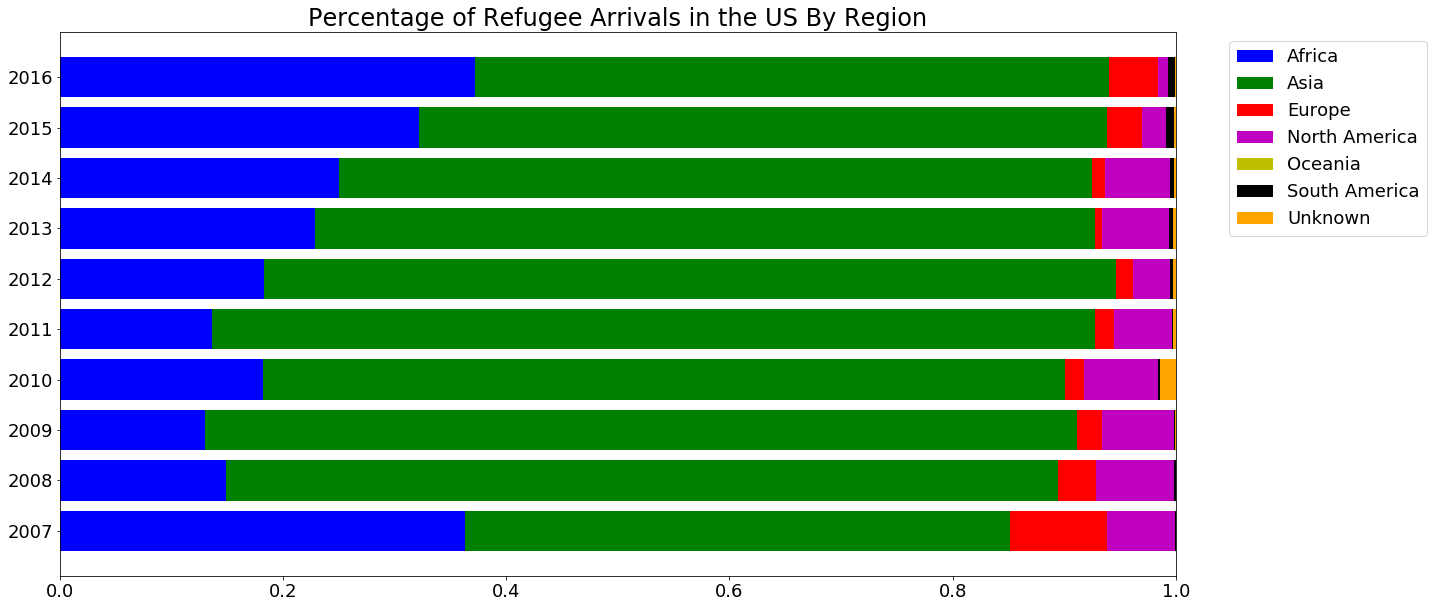

In [10]:
regions = [i for i in list(refugee_by_region.columns) if i not in ['region']]
ind = [x for x, _ in enumerate(regions)]
plt.figure(figsize=(20,10))
sums = np.zeros(shape=(10))
for i,region in enumerate(refugee_by_region.index):
    vals = refugee_by_region.loc[region].values/totals
    plt.barh(ind, vals, label=region, color=colors[i], left=sums)
    sums = np.add(sums,vals)


plt.yticks(ind,regions,fontsize=18)
plt.xticks(fontsize=18)
plt.title("Percentage of Refugee Arrivals in the US By Region", fontsize=24)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 18})
plt.show()


<BarContainer object of 10 artists>

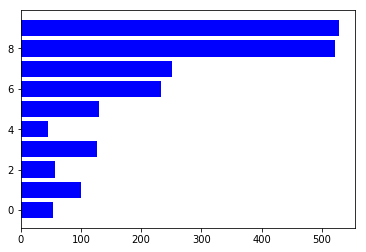

In [11]:
plt.barh(ind, refugee_by_region.loc['South America'].values, label=region, color='b')

In [12]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [13]:
refugee_by_country = dr. get_dhs_data_by_table_number(14)
refugee_by_country = refugee_by_country.loc[~refugee_by_country['Region and country of nationality'].isin(regions)]
refugee_by_country = refugee_by_country.loc[~refugee_by_country['Region and country of nationality'].isin(['Total','REGION','COUNTRY'])]

refugee_by_country=refugee_by_country.rename(columns={'Region and country of nationality':'country'})
refugee_by_country.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Africa,17486,8943,9678,13325,7693.0,10629.0,15984.0,17501.0,22492.0,31648.0
3,Asia,23564,44819,58309,52695,44583.0,44416.0,48840.0,47197.0,43115.0,48287.0
4,Europe,4192,2059,1693,1238,996.0,908.0,482.0,818.0,2164.0,3664.0
5,North America,2922,4177,4800,4856,2930.0,1948.0,4206.0,4066.0,1528.0,811.0
6,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = dict(type='choropleth',
locations = refugee_by_country['country'],
locationmode = 'country names', z = refugee_by_country[2016],
text = refugee_by_country['country'], colorbar = {'title':'Immigration in 2016'},
colorscale = 'Blues',reversescale = True)

In [15]:
layout = dict(title='2016 Immigration',
geo = dict(showframe=False,projection={'type':'robinson'}))

In [16]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [17]:
app_data = dr.get_bp_data_by_table_number(1)

In [18]:
color = 'rgb(128, 0, 32)'

In [19]:
city_coord = {}
for city in app_data['SECTOR'].unique():
    if city in (["Southwest Border"]):
        break
    try:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(city, api_key)
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
        city_coord[city] = [lat, lng]
    except:
        print("Could not find for city {}".format(city))
        
        


Could not find for city Livermore
Could not find for city Miami
Could not find for city New Orleans
Could not find for city Ramey
Could not find for city Blaine
Could not find for city Buffalo
Could not find for city Detroit
Could not find for city Grand Forks
Could not find for city Havre
Could not find for city Houlton
Could not find for city Spokane
Could not find for city Swanton
Could not find for city Big Bend
(formerly Marfa)
Could not find for city Del Rio
Could not find for city El Centro
Could not find for city El Paso
Could not find for city Laredo
Could not find for city Rio Grande Valley
(formerly McAllen)
Could not find for city San Diego
Could not find for city Tucson
Could not find for city Yuma
Could not find for city Coastal Border
Could not find for city Northern Border


In [20]:

totals = []
for city in city_coord:
    totals.append(go.Scattergeo(
        lon = [city_coord.get(city)[1]],
        lat = [city_coord.get(city)[0]],
        text = app_data[(app_data['SECTOR']==city) & (app_data['Fiscal Year']==2017)]['Yearly Total'],
        name = city,
        marker = dict(
            size = app_data[(app_data['SECTOR']==city) & (app_data['Fiscal Year']==2017)]
            ['Yearly Total'].str.replace(',', '').astype(float)/4000,
            color = color,
            line = dict(width = 0)
        ),
    ) )

In [21]:
layout = dict(
        title = 'Apprehensions',
        geo = dict(
            scope='usa',
            showrivers = True,
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)',
            resolution = 50
            
        ),
    )

fig = go.Figure(layout=layout, data=totals)
iplot(fig,validate=False)